In [83]:
#Portfolio Analysis using python

In [4]:
#libraries  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as web 
from datetime import datetime 
plt.style.use("fivethirtyeight")

In [35]:
#Get the stock symbols for portflio
#FAANG
stockSymbols = ["AMZN","AAPL","NFLX","GOOG","TWTR"]

In [40]:
#get stock date
stockStartDate = "2014-01-01"
today = datetime.today().strftime("%Y-%m-%d")

In [41]:
#Number of the assets in the portfolio
numAssets = len(stockSymbols)
print("you have " + str(numAssets) + " assets in your portfolio.")

you have 5 assets in your portfolio.


In [81]:
#get the stock protfolio Adj . Close price   
def getMyProtfolio(stocks=stockSymbols,start = stockStartDate, end = today, col="Adj Close"):
    data = web.DataReader(stocks, data_source="yahoo", start=start, end=end)[col] 
    return data
my_stocks=getMyProtfolio()

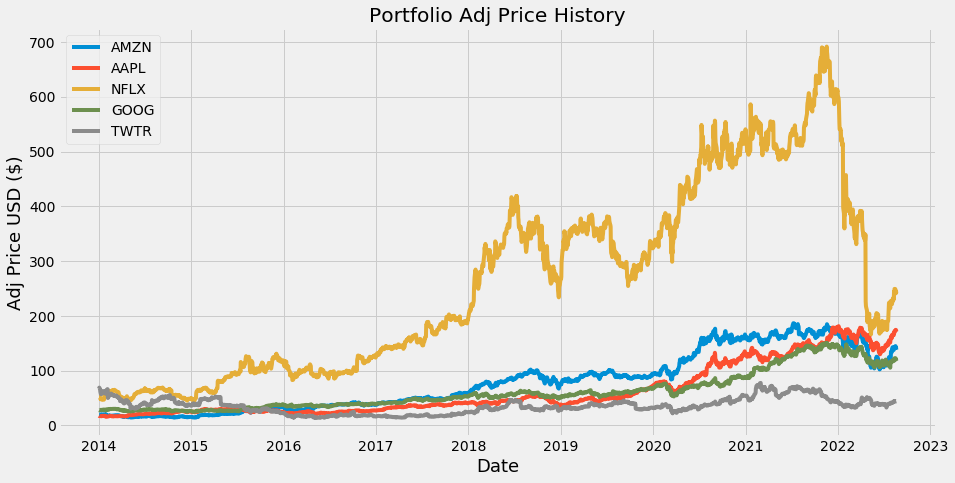

In [54]:
def showGraph():
    title = "Portfolio Adj Price History"
    plt.figure(figsize=(14,7))
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label = c)
    plt.title(title)
    plt.xlabel("Date", fontsize = 18)
    plt.ylabel("Adj Price USD ($)", fontsize = 18)
    plt.legend(my_stocks.columns.values, loc = "upper left" )
    plt.show()
showGraph() 

In [55]:
#show the simple returns 
daily_simple_returns =  my_stocks.pct_change(1)
daily_simple_returns


Symbols,AMZN,AAPL,NFLX,GOOG,TWTR
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.003845,-0.021966,0.000772,-0.007295,0.022222
2014-01-06,-0.007088,0.005453,-0.009722,0.011149,-0.039275
2014-01-07,0.011178,-0.007151,-0.055817,0.019278,-0.072862
2014-01-08,0.009773,0.006333,0.004389,0.002081,-0.035307
...,...,...,...,...,...
2022-08-15,-0.002578,0.006334,-0.000762,0.001875,0.005423
2022-08-16,0.011175,-0.000924,-0.013729,-0.003011,-0.002247
2022-08-17,-0.018511,0.008785,-0.018479,-0.017876,-0.009234


In [56]:
#show the stock correlation
daily_simple_returns.corr() 

Symbols,AMZN,AAPL,NFLX,GOOG,TWTR
Symbols,,,,,
AMZN,1.000000,0.541587,0.512655,0.636622,0.325478
AAPL,0.541587,1.000000,0.393270,0.597124,0.326753
NFLX,0.512655,0.393270,1.000000,0.472624,0.296157
GOOG,0.636622,0.597124,0.472624,1.000000,0.353636
TWTR,0.325478,0.326753,0.296157,0.353636,1.000000


In [57]:
#show covariance matrix for the simple returns
daily_simple_returns.cov()

Symbols,AMZN,AAPL,NFLX,GOOG,TWTR
Symbols,,,,,
AMZN,0.000419,0.000200,0.000296,0.000222,0.000223
AAPL,0.000200,0.000326,0.000200,0.000183,0.000198
NFLX,0.000296,0.000200,0.000794,0.000226,0.000280
GOOG,0.000222,0.000183,0.000226,0.000289,0.000202
TWTR,0.000223,0.000198,0.000280,0.000202,0.001124


In [58]:
#show variance   for the simple returns
daily_simple_returns.var()

Symbols
AMZN    0.000419
AAPL    0.000326
NFLX    0.000794
GOOG    0.000289
TWTR    0.001124
dtype: float64

In [59]:
#show the stander deviation for daily simple returns 
print("The Stock Volatility ")
daily_simple_returns.std()

The Stock Volatility 


Symbols
AMZN    0.020468
AAPL    0.018051
NFLX    0.028178
GOOG    0.016999
TWTR    0.033521
dtype: float64

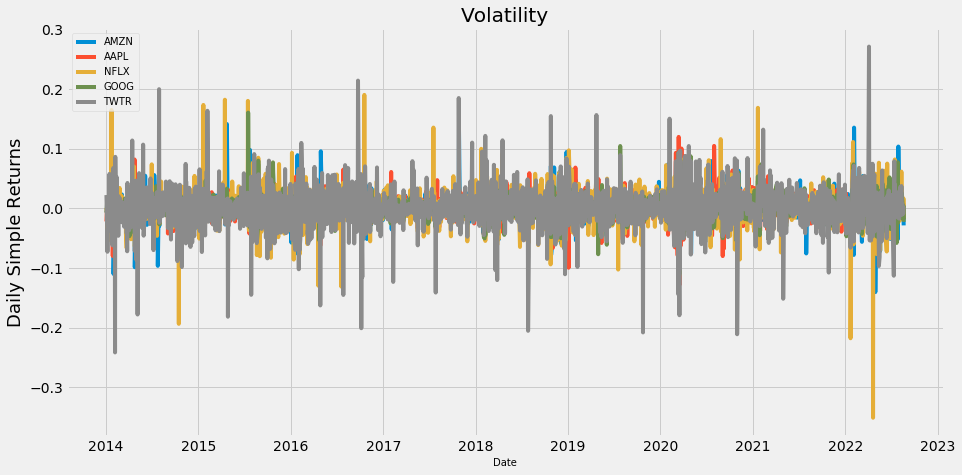

In [64]:
# Visualize  the stocks daily simple returns / Volatility
plt.figure(figsize=(14,7))
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c], label = c, lw=2)
plt.title("Volatility")
plt.xlabel("Date", fontsize = 10)
plt.ylabel("Daily Simple Returns", fontsize = 18)
plt.legend(daily_simple_returns.columns.values, loc = "upper left", fontsize = 10 )
plt.show()
 

In [66]:
#show the mean of the daily simple returns 
dailyMeanSimpleReturns = daily_simple_returns.mean()
print(dailyMeanSimpleReturns)

Symbols
AMZN    0.001101
AAPL    0.001215
NFLX    0.001113
GOOG    0.000811
TWTR    0.000372
dtype: float64


In [71]:
#Calculate the expected portfolio daily return
randomWeights = np.array([0.3, 0.2, .3, .1,.1])
portfolioSimpleReturn = np.sum( dailyMeanSimpleReturns *  randomWeights)
print("The daily expected portfolio return " + str(portfolioSimpleReturn) )

The daily expected portfolio return 0.0010255775165743067


In [77]:
print("Expected annualised portfolio return " +str(portfolioSimpleReturn * 253) )


Expected annualised portfolio return 0.2594711116932996


In [78]:
# Calculate the Growth of the investment
dailyCumlSimplReturn = (daily_simple_returns+1).cumprod()
dailyCumlSimplReturn

Symbols,AMZN,AAPL,NFLX,GOOG,TWTR
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.996155,0.978034,1.000772,0.992705,1.022222
2014-01-06,0.989095,0.983367,0.991042,1.003773,0.982074
2014-01-07,1.000151,0.976335,0.935726,1.023124,0.910519
2014-01-08,1.009925,0.982518,0.939832,1.025253,0.878370
...,...,...,...,...,...
2022-08-15,7.195517,9.928102,4.806157,4.432247,0.659259
2022-08-16,7.275925,9.918930,4.740174,4.418902,0.657778
2022-08-17,7.141242,10.006064,4.652582,4.339909,0.651704


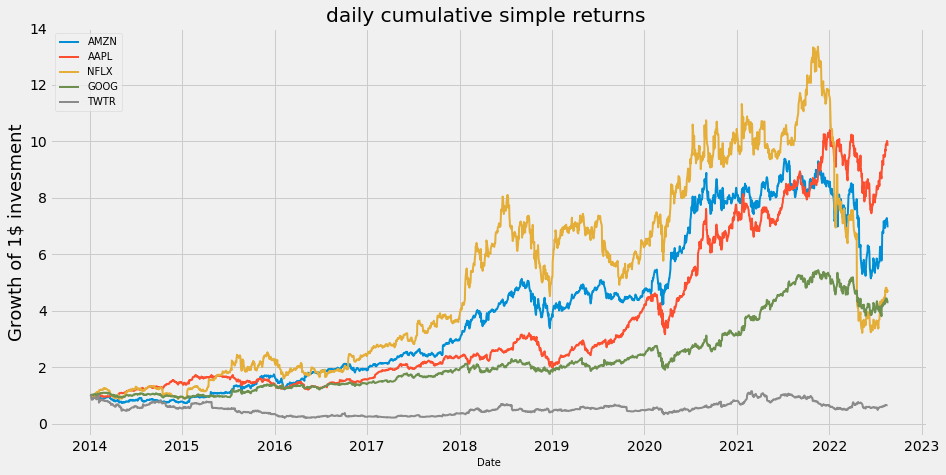

In [82]:
# Visualize  the  daily cumulative simple returns 
plt.figure(figsize=(14,7))
for c in dailyCumlSimplReturn.columns.values:
    plt.plot(dailyCumlSimplReturn[c], label = c, lw=2)
plt.title("daily cumulative simple returns ")
plt.xlabel("Date", fontsize = 10)
plt.ylabel("Growth of 1$ invesment", fontsize = 18)
plt.legend(dailyCumlSimplReturn.columns.values, loc = "upper left", fontsize = 10 )
plt.show()